2025-05-22 06:38:33.080974: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 06:38:33.085444: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-22 06:38:33.095634: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747895913.117257    2363 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747895913.123816    2363 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747895913.140093    2363 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

First 3 input-output pairs:
Input: [1 2 3 4 5] -> Target: 6
Input: [2 3 4 5 6] -> Target: 7
Input: [3 4 5 6 7] -> Target: 8


2025-05-22 06:38:39.498316: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/c4aa6a31-8778-4e79-96de-ab90cdd4435a/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3892.2471 - mae: 55.3371
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3392.4338 - mae: 51.2374 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3803.0762 - mae: 54.7528 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3596.3059 - mae: 53.8211 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3428.9382 - mae: 51.5364 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3390.1355 - mae: 50.1882 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3671.7424 - mae: 54.0872 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3439.9209 - mae: 51.9908 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2781.8457 - mae: 44.1671 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3113.3777 - mae: 48.1600 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2970.6418 - mae: 46.3301 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3195.2432 - mae:

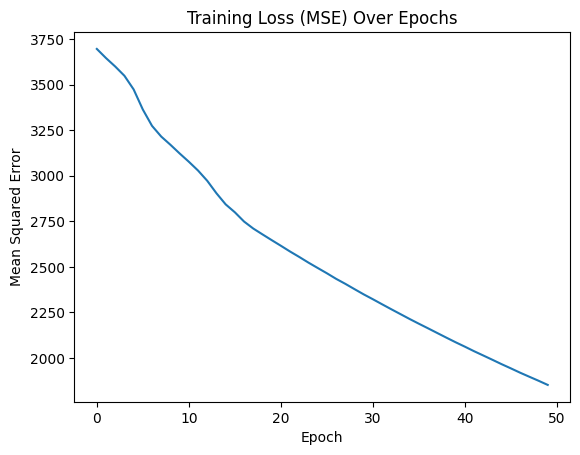

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step

Given the input sequence [15, 16, 17, 18, 19], the model predicts: 19.5
Expected value: 20


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

full_sequence = np.arange(1, 101)

def generate_input_output_pairs(sequence, sequence_length=5):
    inputs, targets = [], []
    for i in range(len(sequence) - sequence_length):
        inputs.append(sequence[i:i + sequence_length])
        targets.append(sequence[i + sequence_length])
    return np.array(inputs), np.array(targets)

sequence_length = 5
features, labels = generate_input_output_pairs(full_sequence, sequence_length)

features = features.reshape((features.shape[0], features.shape[1], 1))

print("First 3 input-output pairs:")
for i in range(3):
    print(f"Input: {features[i].flatten()} -> Target: {labels[i]}")

rnn_model = Sequential([
    SimpleRNN(units=32, input_shape=(sequence_length, 1)),
    Dense(units=1)
])

rnn_model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mae'])

rnn_model.summary()

training_logs = rnn_model.fit(features, labels, epochs=50, batch_size=8, verbose=1)

plt.plot(training_logs.history['loss'])
plt.title('Training Loss (MSE) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.show()

test_input = np.array([15, 16, 17, 18, 19]).reshape(1, sequence_length, 1)
predicted_output = rnn_model.predict(test_input)

print(f"\nGiven the input sequence [15, 16, 17, 18, 19], the model predicts: {predicted_output[0][0]:.1f}")
print(f"Expected value: 20")